In [4]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
import os

In [28]:
# def load_train_imgs(path):
#     classes = ['PNEUMONIA','NORMAL']
#     imgs = []
#     labels = []
#     for i in classes:
#         l2 = os.listdir(path + i)
#         for j in l2:
#             img = Image.open(path+i+'/'+j).convert('RGB')
#             img = img.resize(size=(32,32))
#             imgs.append(np.array(img))
#             labels.append(i)
#             del img
#         return labels,np.array(imgs)

In [31]:
def load_train_imgs(path):
    classes = ['PNEUMONIA', 'NORMAL']
    imgs = []
    labels = []
    for i in classes:
        l2 = os.listdir(os.path.join(path, i))  # Use os.path.join for correct path concatenation
        for j in l2:
            img = Image.open(os.path.join(path, i, j)).convert('RGB')  # Use os.path.join for correct path concatenation
            img = img.resize(size=(32, 32))
            imgs.append(np.array(img))
            labels.append(i)
            del img
    return labels, np.array(imgs)


In [33]:
y_train,x_train = load_train_imgs("C:/Users/Hp/Documents/Documents/College Assignments/PractCodes/Pneumonia X Ray/chest_xray/train")

In [34]:
x_train

array([[[[ 32,  32,  32],
         [ 58,  58,  58],
         [ 86,  86,  86],
         ...,
         [ 46,  46,  46],
         [ 33,  33,  33],
         [ 15,  15,  15]],

        [[ 37,  37,  37],
         [ 58,  58,  58],
         [102, 102, 102],
         ...,
         [ 48,  48,  48],
         [ 35,  35,  35],
         [ 18,  18,  18]],

        [[ 39,  39,  39],
         [ 59,  59,  59],
         [ 91,  91,  91],
         ...,
         [ 49,  49,  49],
         [ 36,  36,  36],
         [ 20,  20,  20]],

        ...,

        [[  5,   5,   5],
         [ 23,  23,  23],
         [ 82,  82,  82],
         ...,
         [  5,   5,   5],
         [ 14,  14,  14],
         [ 17,  17,  17]],

        [[  4,   4,   4],
         [ 24,  24,  24],
         [ 84,  84,  84],
         ...,
         [  5,   5,   5],
         [ 13,  13,  13],
         [ 16,  16,  16]],

        [[  4,   4,   4],
         [ 25,  25,  25],
         [ 84,  84,  84],
         ...,
         [  6,   6,   6],
        

In [35]:
y_train

['PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEU

In [37]:
model = Sequential([
    Conv2D(64,input_shape=(x_train.shape[1:]),kernel_size=3,activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32,kernel_size=3,activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.25),
    Dense(256,activation='relu'),
    Dropout(0.25),
    Dense(2,activation='softmax')
])

In [44]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1152)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [46]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
Y_train = encode.fit_transform(y_train)

In [47]:
Y_train

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [48]:
history = model.fit(x_train,Y_train,epochs=20,batch_size=16)

Epoch 1/20
326/326 [==============================] - 5s 12ms/step - loss: 0.8523 - accuracy: 0.7651
Epoch 2/20
326/326 [==============================] - 4s 13ms/step - loss: 0.5271 - accuracy: 0.7713
Epoch 3/20
326/326 [==============================] - 6s 17ms/step - loss: 0.3950 - accuracy: 0.8441
Epoch 4/20
326/326 [==============================] - 6s 19ms/step - loss: 0.2250 - accuracy: 0.9156
Epoch 5/20
326/326 [==============================] - 6s 19ms/step - loss: 0.1973 - accuracy: 0.9241
Epoch 6/20
326/326 [==============================] - 7s 22ms/step - loss: 0.1693 - accuracy: 0.9321
Epoch 7/20
326/326 [==============================] - 6s 17ms/step - loss: 0.2181 - accuracy: 0.9212
Epoch 8/20
326/326 [==============================] - 5s 17ms/step - loss: 0.1694 - accuracy: 0.9375
Epoch 9/20
326/326 [==============================] - 6s 17ms/step - loss: 0.1527 - accuracy: 0.9392
Epoch 10/20
326/326 [==============================] - 6s 17ms/step - loss: 0.1423 - accura

In [52]:
def load_test_imgs(path):
    classes = ['PNEUMONIA','NORMAL']
    imgs = []
    labels = []
    for i in classes:
        l2 = os.listdir(os.path.join(path,i))
        for j in l2:
            img = Image.open(os.path.join(path,i,j)).convert('RGB')
            img = img.resize(size=(32,32))
            imgs.append(np.array(img))
            labels.append(i)
            del img
        return labels,np.array(imgs)

In [53]:
y_test,x_test = load_test_imgs("C:/Users/Hp/Documents/Documents/College Assignments/PractCodes/Pneumonia X Ray/chest_xray/test")

In [54]:
x_test

array([[[[ 26,  26,  26],
         [ 47,  47,  47],
         [ 83,  83,  83],
         ...,
         [ 92,  92,  92],
         [103, 103, 103],
         [ 93,  93,  93]],

        [[ 23,  23,  23],
         [ 46,  46,  46],
         [ 57,  57,  57],
         ...,
         [ 97,  97,  97],
         [105, 105, 105],
         [ 86,  86,  86]],

        [[ 17,  17,  17],
         [ 45,  45,  45],
         [ 50,  50,  50],
         ...,
         [ 94,  94,  94],
         [ 96,  96,  96],
         [ 68,  68,  68]],

        ...,

        [[  0,   0,   0],
         [  6,   6,   6],
         [ 72,  72,  72],
         ...,
         [ 62,  62,  62],
         [  1,   1,   1],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  8,   8,   8],
         [ 66,  66,  66],
         ...,
         [ 61,  61,  61],
         [  4,   4,   4],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  9,   9,   9],
         [ 62,  62,  62],
         ...,
         [ 66,  66,  66],
        

In [55]:
y_test

['PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEU

In [56]:
y_test[0]

'PNEUMONIA'

In [59]:
predicted_value = model.predict(x_test)

13/13 [==============================] - 0s 8ms/step


13/13 [==============================] - 0s 8ms/step
[0.04057774 0.9594223 ]
1
PNEUMONIA
PNEUMONIA Detected


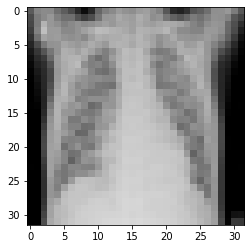

In [61]:
import random

n = random.randint(0,1000)
plt.imshow(x_test[n])

predicted_value = model.predict(x_test)
print(predicted_value[n])

output = np.argmax(predicted_value[n])
print(output)
print(classes[output])

if predicted_value[n][1] == 1:
    print("PNEUMONIA Detected")
elif predicted_value[n][0] > predicted_value[n][1]:
    print("No PNEUMONIA Detected")
else:
    print("PNEUMONIA Detected")
    

In [62]:
print(y_test[n])

PNEUMONIA


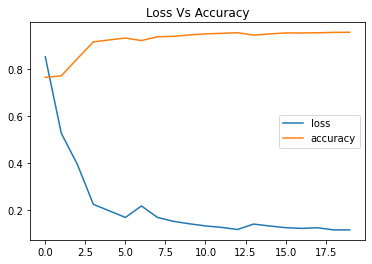

In [65]:
plt.title('Loss Vs Accuracy')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='accuracy')
plt.legend()